# Task
Build a linear regression model to predict students' exam scores based on their study hours using the dataset at "/content/StudentPerformanceFactors.csv". Clean and visualize the data, split it into training and testing sets, train the model, visualize the predictions, and evaluate the model's performance.

## Data loading

### Subtask:
Load the data from "/content/StudentPerformanceFactors.csv" into a dataframe.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

df = pd.read_csv('/content/StudentPerformanceFactors.csv')
display(df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Data cleaning and visualization

### Subtask:
Perform data cleaning and basic visualization to understand the dataset.


**Reasoning**:
Check data types, identify and count missing values, handle missing values, and create visualizations to understand the data distribution and the relationship between the predictor and target variable.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

None

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


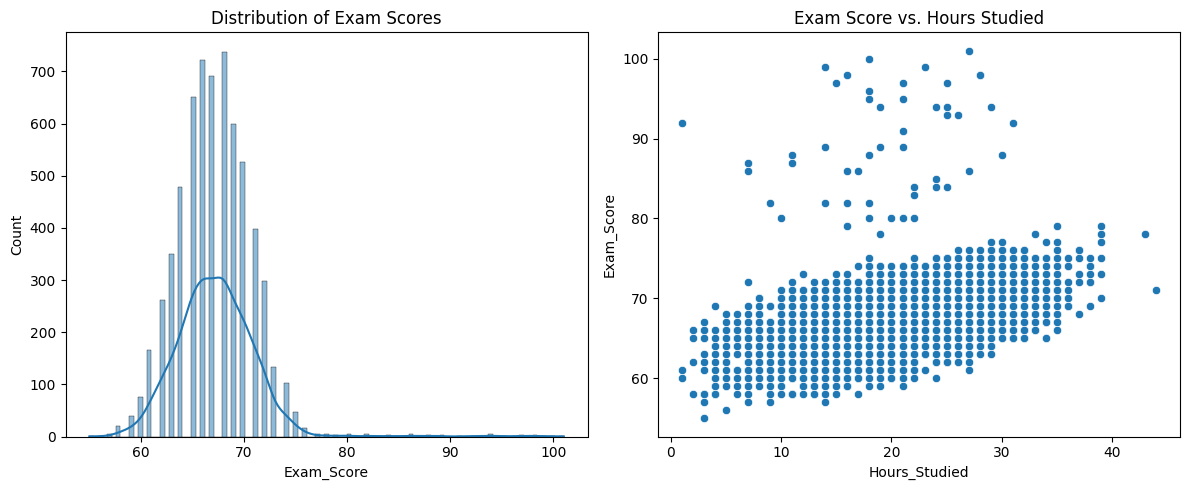

In [2]:
display(df.info())
display(df.isnull().sum())
df.dropna(inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Exam_Score'], kde=True)
plt.title('Distribution of Exam Scores')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Exam Score vs. Hours Studied')

plt.tight_layout()
plt.show()

## Split the dataset

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the 'Hours_Studied' as the feature and 'Exam_Score' as the target.



In [3]:
from sklearn.model_selection import train_test_split

X = df['Hours_Studied'].values.reshape(-1, 1)
y = df['Exam_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5102, 1)
Shape of X_test: (1276, 1)
Shape of y_train: (5102,)
Shape of y_test: (1276,)


## Train a linear regression model

### Subtask:
Train a linear regression model to estimate the final score.


**Reasoning**:
Import the LinearRegression class, instantiate a LinearRegression model, and fit the model to the training data.



In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Visualize and evaluate

### Subtask:
Visualize predictions and evaluate model performance.


**Reasoning**:
Predict the exam scores on the test set using the trained model, then generate a scatter plot of the test data and the regression line, and finally calculate and print the MSE and R-squared score.



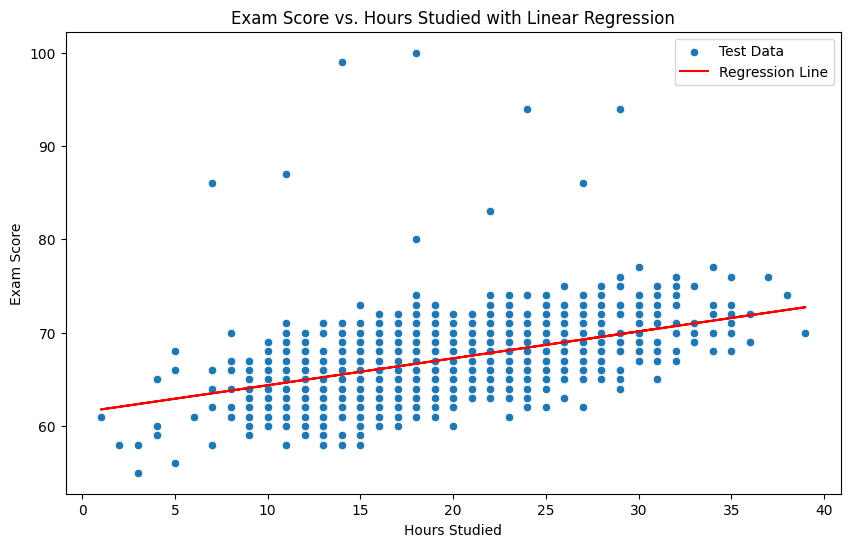

Mean Squared Error: 12.35
R-squared Score: 0.21


In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Test Data')
plt.plot(X_test.flatten(), y_pred, color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Exam Score vs. Hours Studied with Linear Regression')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

## Summary:

### Data Analysis Key Findings

*   Missing values were present in the 'Teacher\_Quality', 'Parental\_Education\_Level', and 'Distance\_from\_Home' columns and were handled by dropping the corresponding rows.
*   A positive linear relationship was observed between 'Hours\_Studied' and 'Exam\_Score' in the scatter plot.
*   The dataset was split into training (5102 samples) and testing (1276 samples) sets, with 80% used for training and 20% for testing.
*   A linear regression model was successfully trained on the training data.
*   The trained model's predictions showed a Mean Squared Error (MSE) of 12.35 and an R-squared score of 0.21 on the test set.

### Insights or Next Steps

*   While a positive relationship between study hours and exam score exists, the low R-squared score (0.21) suggests that 'Hours\_Studied' alone is not a strong predictor of 'Exam\_Score'.
*   Explore including other relevant features from the dataset, such as 'Teacher\_Quality', 'Parental\_Education\_Level', 'Access\_to\_Resources', and 'Motivation\_Level', in a more complex model to potentially improve prediction accuracy. This would require appropriate encoding for categorical features.
